In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, binom
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import os
import math

Loading the dataframe

In [2]:
shots=pd.read_csv(os.path.join("data","shots_all_seasons.csv"), low_memory=False)
shots.head()


,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Above the Break 3,Left Side Center,LC,24+ ft.,20.0,21.35,25,6,0,0
1,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,6,0,2
2,2004,2003-04,1610612747,Los Angeles Lakers,977,Kobe Bryant,G,SG,04-14-2004,20301187,...,Mid-Range,Left Side Center,LC,16-24 ft.,13.3,24.45,23,6,0,9
3,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Left Side,L,16-24 ft.,16.4,13.95,18,6,0,31
4,2004,2003-04,1610612757,Portland Trail Blazers,757,Damon Stoudamire,G,PG,04-14-2004,20301187,...,Mid-Range,Right Side,R,16-24 ft.,-15.8,7.85,16,6,0,55


In [3]:
shots.tail()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
4450784,2025,2024-25,1610612764,Washington Wizards,1629673,Jordan Poole,NaN,NaN,12-15-2024,22401217,...,Restricted Area,Center,C,Less Than 8 ft.,-1.5,5.35,1,4,3,14
4450785,2025,2024-25,1610612764,Washington Wizards,1629673,Jordan Poole,NaN,NaN,12-15-2024,22401217,...,Above the Break 3,Right Side Center,RC,24+ ft.,-18.3,31.95,32,4,2,53
4450786,2025,2024-25,1610612764,Washington Wizards,1642259,Alex Sarr,NaN,NaN,12-15-2024,22401217,...,Right Corner 3,Right Side,R,24+ ft.,-22.9,8.45,23,4,2,11
4450787,2025,2024-25,1610612764,Washington Wizards,1630551,Justin Champagnie,NaN,NaN,12-15-2024,22401217,...,Restricted Area,Center,C,Less Than 8 ft.,0.7,6.65,1,4,1,45
4450788,2025,2024-25,1610612764,Washington Wizards,1629673,Jordan Poole,NaN,NaN,12-15-2024,22401217,...,Restricted Area,Center,C,Less Than 8 ft.,-1.7,6.95,2,4,1,20


Plotting the court for visual examples

<Axes: >

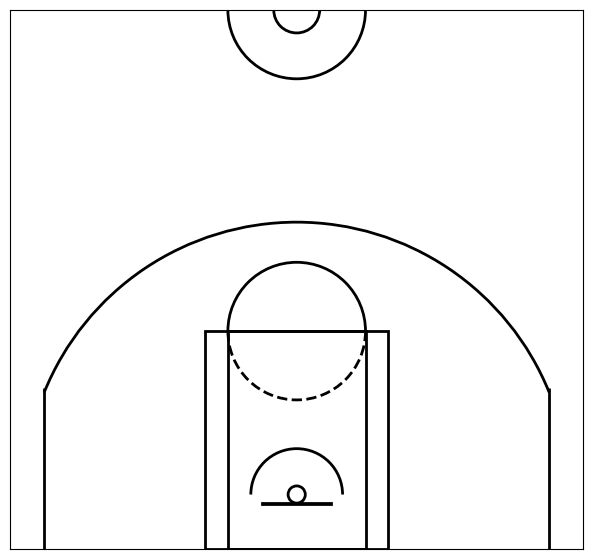

In [4]:

fig, ax = plt.subplots(figsize=(10, 7))
def draw_court(ax=None, color='black', lw=2, outer_lines=False, interval=20):
    if ax is None:
        ax = plt.gca()

    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                    bottom_free_throw, restricted, corner_three_a,
                    corner_three_b, three_arc, center_outer_arc,
                    center_inner_arc]

    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-250, 250)
    ax.set_ylim(-47.5, 422.5)
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

draw_court(ax)

Analyzed season played by said player

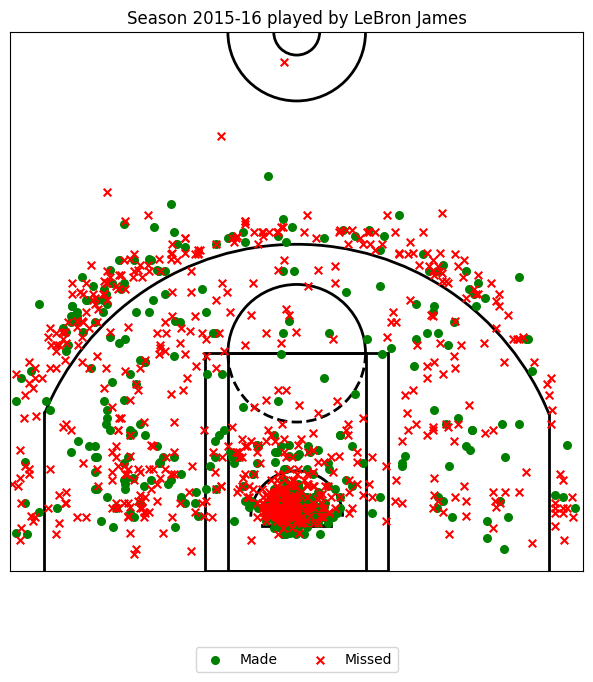

In [5]:
player = 'LeBron James' 
season = 2016
shotsfiltered=shots[
    (shots['SEASON_1'] == season) & 
    (shots['PLAYER_NAME'] == player)
]

made_shots = shotsfiltered[shotsfiltered['SHOT_MADE'] == True]
missed_shots = shotsfiltered[shotsfiltered['SHOT_MADE'] == False]

completeseason = (shotsfiltered['SEASON_2']).iloc[0]

fig, ax = plt.subplots(figsize=(10, 7))

draw_court(ax)

offset=51.7

ax.scatter(made_shots['LOC_X'] * -10 , made_shots['LOC_Y'] * 10 - offset, 
                    color='green', label='Made', s=30)
ax.scatter(missed_shots['LOC_X'] * -10 , missed_shots['LOC_Y'] * 10 - offset, 
                    color='red', label='Missed', marker='x', s=30)


ax.set_title(f"Season {completeseason} played by {player}")
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)


plt.show()

In [ ]:
distanzefiltered = np.sqrt(shotsfiltered['LOC_X']**2 + shotsfiltered['LOC_Y']**2)

distanze=distanzefiltered[distanzefiltered<45] #tiri prima di metà campo

media = np.mean(distanze)
mediana = np.median(distanze)
# La moda sui numeri decimali non ha senso, arrotondiamo all'intero più vicino per trovarla
moda = stats.mode(np.round(distanze), keepdims=True).mode[0]

varianza = np.var(distanze)
dev_std = np.std(distanze) 
minimo = np.min(distanze)
massimo = np.max(distanze)

# --- Quartili e Percentili ---
q1 = np.percentile(distanze, 25) # Il 25% dei tiri è sotto questa distanza
q3 = np.percentile(distanze, 75) # Il 75% dei tiri è sotto questa distanza
iqr = q3 - q1 # Range Interquartile (dispersione centrale)

# 3. Stampa del Report Formattato
print(f"--- REPORT STATISTICO: {player} ({season}) ---")
print(f"Totale Tiri Analizzati: {len(distanze)}")
print("-" * 40)
print("MISURE DI POSIZIONE (Tendenza Centrale):")
print(f"Media (Mean):      {media:.2f} piedi")
print(f"Mediana (Median):  {mediana:.2f} piedi")
print(f"Moda (Mode):       {moda:.0f} piedi (distanza più frequente)")
print("-" * 40)
print("MISURE DI DISPERSIONE (Variabilità):")
print(f"Varianza:            {varianza:.2f}")
print(f"Deviazione Standard: {dev_std:.2f} piedi")
print(f"Minimo - Massimo:    da {minimo:.1f} a {massimo:.1f} piedi")
print(f"Range Interquartile: {iqr:.2f} piedi")
print("-" * 40)


--- REPORT STATISTICO: LeBron James (2016) ---
Totale Tiri Analizzati: 1415
----------------------------------------
MISURE DI POSIZIONE (Tendenza Centrale):
Media (Mean):      14.12 piedi
Mediana (Median):  9.20 piedi
Moda (Mode):       6 piedi (distanza più frequente)
----------------------------------------
MISURE DI DISPERSIONE (Variabilità):
Varianza:            92.53
Deviazione Standard: 9.62 piedi
Minimo - Massimo:    da 3.7 a 44.9 piedi
Range Interquartile: 17.47 piedi
----------------------------------------


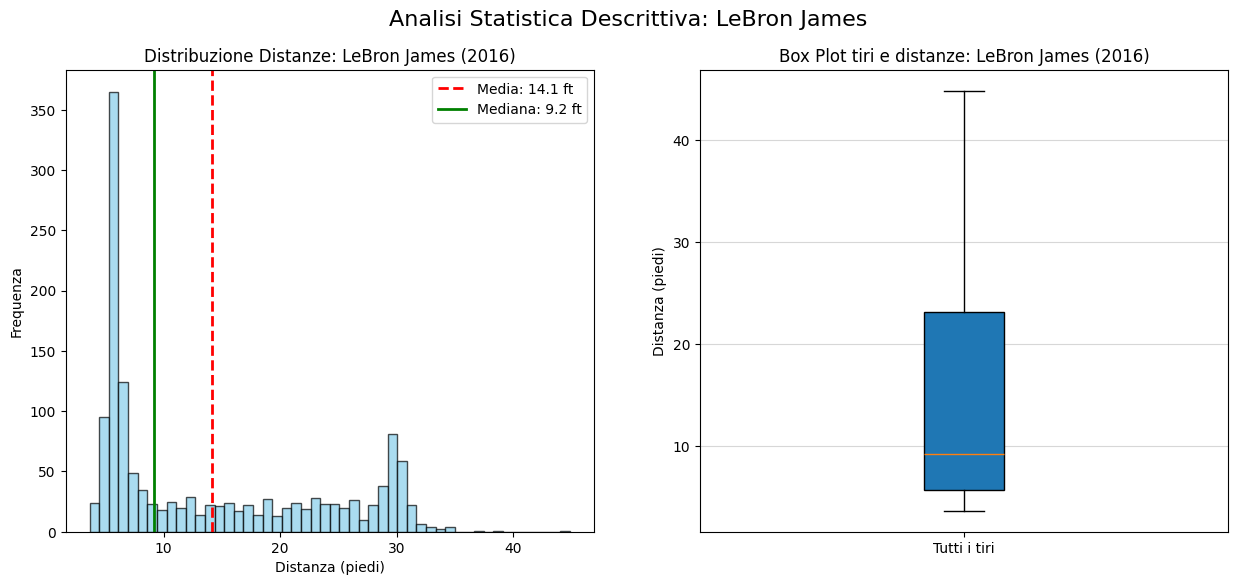

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].hist(distanze, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

ax[0].axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.1f} ft')
ax[0].axvline(mediana, color='green', linestyle='solid', linewidth=2, label=f'Mediana: {mediana:.1f} ft')
ax[0].set_title(f'Distribuzione Distanze: {player} ({season})')
ax[0].set_xlabel('Distanza (piedi)')
ax[0].set_ylabel('Frequenza')
ax[0].legend()
                                                                                                                
box = ax[1].boxplot(distanze, vert=True, patch_artist=True, tick_labels=['Tutti i tiri'])

ax[1].set_title(f'Box Plot tiri e distanze: {player} ({season})')
ax[1].set_ylabel('Distanza (piedi)')
ax[1].grid(axis='y', alpha=0.5)

plt.suptitle(f"Analisi Statistica Descrittiva: {player}", fontsize=16)
plt.show()

Gaussian distribution comparison

It's almost impossible to get a gaussian normal with shots data as they do not depend on a trend but vary from player to player


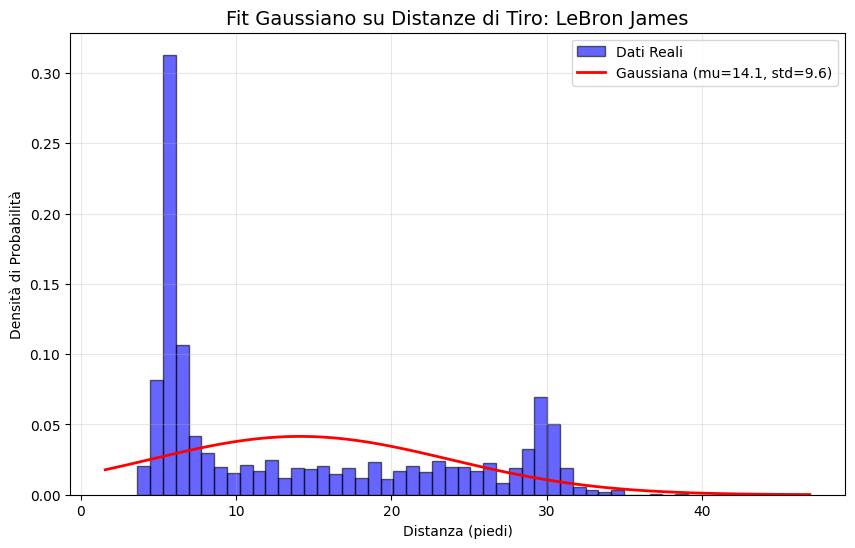

In [8]:
mu, std = norm.fit(distanze) # Mu = Media, Std = Deviazione Standard

# 3. Creiamo il grafico
plt.figure(figsize=(10, 6))

# A. L'Istogramma dei dati reali (Density=True è fondamentale per confrontare con la curva)
plt.hist(distanze, bins=50, density=True, alpha=0.6, color='blue', edgecolor='black', label="Dati Reali")

# B. La Curva Gaussiana Teorica
xmin, xmax = plt.xlim() # Prendiamo i limiti dell'asse X
x = np.linspace(xmin, xmax, 100) # Generiamo 100 punti lungo l'asse X
p = norm.pdf(x, media, std) # Calcoliamo l'altezza della curva per ogni punto
plt.plot(x, p, 'r', linewidth=2, label=f'Gaussiana (mu={mu:.1f}, std={std:.1f})')

# C. Personalizzazione
plt.title(f'Fit Gaussiano su Distanze di Tiro: {player}', fontsize=14)
plt.xlabel('Distanza (piedi)')
plt.ylabel('Densità di Probabilità')
plt.legend()
plt.grid(alpha=0.3)
print("It's almost impossible to get a gaussian normal with shots data as they do not depend on a trend but vary from player to player")

plt.show()

In [9]:
# ==========================================
# 1. PERMUTAZIONE SEMPLICE (P_n)
# Definizione: Ordinare n oggetti DIVERSI.
# Esempio: In che ordine posso presentare lo Starting 5 (5 giocatori diversi)?
# ==========================================
n_giocatori = 5 # Curry, Thompson, Green, Wiggins, Looney
p_semplice = math.factorial(n_giocatori)

print(f"Permutazione semplice")
print(f"In quanti ordini lo speaker può annunciare i 5 titolari?")
print("5!")
print(f"{p_semplice} modi diversi.\n")


# ==========================================
# 2. PERMUTAZIONE CON RIPETIZIONE (P_n^(k...))
# Definizione: Ordinare n oggetti dove alcuni sono UGUALI tra loro.
# Esempio: Una serie di 4 partite finisce con 3 Vittorie (V) e 1 Sconfitta (S).
#          Quante sequenze diverse esistono? (es. V-V-V-S, S-V-V-V, ecc.)
# ==========================================
n_totale = 4    # Partite totali
n_vittorie = 3  # V si ripete 3 volte
n_sconfitte = 1 # S si ripete 1 volta

p_ripetizione = math.factorial(n_totale) // (math.factorial(n_vittorie) * math.factorial(n_sconfitte))

print(f"2. PERMUTAZIONE CON RIPETIZIONE")
print(f"   Domanda: 'In quanti modi diversi possono uscire 3 Vittorie e 1 Sconfitta in 4 gare?'")
print(f"   Calcolo: 4! / (3! * 1!)")
print(f"   Risultato: {p_ripetizione} sequenze diverse.\n")


# ==========================================
# 3. DISPOSIZIONE SEMPLICE (D_n,k)
# Definizione: Scegliere k oggetti su n e ORDINARLI (l'ordine conta).
# Esempio: Ho 15 giocatori in rosa. Devo scegliere chi fa il Playmaker e chi la Guardia.
#          (Curry-Thompson è diverso da Thompson-Curry perché cambiano i ruoli).
# ==========================================
n_rosa = 15
k_ruoli = 2 # Playmaker, Guardia

# Formula: n! / (n-k)!
d_semplice = math.perm(n_rosa, k_ruoli)

print(f"3. DISPOSIZIONE SEMPLICE")
print(f"   Domanda: 'In quanti modi posso assegnare i ruoli di Play e Guardia scegliendo tra 15 giocatori?'")
print(f"   Calcolo: 15 * 14")
print(f"   Risultato: {d_semplice} coppie ordinate.\n")


# ==========================================
# 4. DISPOSIZIONE CON RIPETIZIONE (D'_n,k)
# Definizione: Scegliere k oggetti su n, l'ordine conta, POSSO RIPETERE l'oggetto.
# Esempio: La schedina (Totocalcio NBA). Pronosticare l'esito (1, 2) di 5 partite.
#          Posso usare "1" (vittoria casa) più volte.
# ==========================================
n_esiti = 2    # 1 (Vittoria), 2 (Sconfitta)
k_partite = 5  # Numero di partite da indovinare

# Formula: n^k
d_ripetizione = n_esiti ** k_partite

print(f"4. DISPOSIZIONE CON RIPETIZIONE")
print(f"   Domanda: 'Quante colonne diverse della schedina esistono per 5 partite (Esito 1 o 2)?'")
print(f"   Calcolo: 2^5")
print(f"   Risultato: {d_ripetizione} combinazioni di risultati.\n")


# ==========================================
# 5. COMBINAZIONE SEMPLICE (C_n,k)
# Definizione: Scegliere k oggetti su n, l'ordine NON conta.
# Esempio: Ho 15 giocatori. Ne devo scegliere 5 da mandare in campo.
#          (Avere Curry, Green, Thompson è uguale ad avere Thompson, Green, Curry).
# ==========================================
n_rosa = 15
k_quintetto = 5

# Formula: n! / (k! * (n-k)!)
c_semplice = math.comb(n_rosa, k_quintetto)

print(f"5. COMBINAZIONE SEMPLICE")
print(f"   Domanda: 'Quanti quintetti diversi posso formare con 15 giocatori (senza distinzione di ruolo)?'")
print(f"   Calcolo: C(15, 5)")
print(f"   Risultato: {c_semplice} quintetti possibili.\n")


# ==========================================
# 6. COMBINAZIONE CON RIPETIZIONE (C'_n,k)
# Definizione: Scegliere k oggetti su n, ordine NON conta, POSSO RIPETERE.
# Esempio: Allo shop vendono 3 tipi di maglie (Curry, Thompson, Green).
#          Voglio comprarne 4 (posso prenderne 3 di Curry e 1 di Green).
# ==========================================
n_tipi_maglie = 3 # Tipi disponibili
k_acquisti = 4    # Quante ne compro

# Formula: C(n+k-1, k)
c_ripetizione = math.comb(n_tipi_maglie + k_acquisti - 1, k_acquisti)

print(f"6. COMBINAZIONE CON RIPETIZIONE")
print(f"   Domanda: 'In quanti modi posso comprare 4 maglie scegliendo tra 3 giocatori?'")
print(f"   Calcolo: C(3+4-1, 4) = C(6, 4)")
print(f"   Risultato: {c_ripetizione} assortimenti possibili.\n")

Permutazione semplice
In quanti ordini lo speaker può annunciare i 5 titolari?
5!
120 modi diversi.

2. PERMUTAZIONE CON RIPETIZIONE
   Domanda: 'In quanti modi diversi possono uscire 3 Vittorie e 1 Sconfitta in 4 gare?'
   Calcolo: 4! / (3! * 1!)
   Risultato: 4 sequenze diverse.

3. DISPOSIZIONE SEMPLICE
   Domanda: 'In quanti modi posso assegnare i ruoli di Play e Guardia scegliendo tra 15 giocatori?'
   Calcolo: 15 * 14
   Risultato: 210 coppie ordinate.

4. DISPOSIZIONE CON RIPETIZIONE
   Domanda: 'Quante colonne diverse della schedina esistono per 5 partite (Esito 1 o 2)?'
   Calcolo: 2^5
   Risultato: 32 combinazioni di risultati.

5. COMBINAZIONE SEMPLICE
   Domanda: 'Quanti quintetti diversi posso formare con 15 giocatori (senza distinzione di ruolo)?'
   Calcolo: C(15, 5)
   Risultato: 3003 quintetti possibili.

6. COMBINAZIONE CON RIPETIZIONE
   Domanda: 'In quanti modi posso comprare 4 maglie scegliendo tra 3 giocatori?'
   Calcolo: C(3+4-1, 4) = C(6, 4)
   Risultato: 15 as

--- TEORIA DELLA PROBABILITÀ APPLICATA ---
1. UNIVERSO (Omega): Tutti i tiri tentati.
   Cardinalità dell'Universo: 1415

2. EVENTO A ('Tiro da 3 Punti')
   Cardinalità Evento A: 281
   Probabilità P(A): 19.86% (Frequenza relativa)

3. TIPI DI EVENTI
   Probabilità Evento Certo (Segnato o Sbagliato): 1 (cioè 100%)
   Probabilità Evento Impossibile (Distanza < 0):  0 (cioè 0%)

4. EVENTI COMPLEMENTARI (Made vs Missed)
   P(Segnato) + P(Sbagliato) = 0.52 + 0.48 = 1.0

5. EVENTI INCOMPATIBILI (2PT vs 3PT)
   Elementi nell'intersezione (2PT AND 3PT): 0
   Interpretazione: È impossibile che un tiro sia contemporaneamente da 2 e da 3.

6. SISTEMA COMPLETO (Partizione)
   Somma delle 4 parti: 1415
   Uguale all'Universo? SÌ


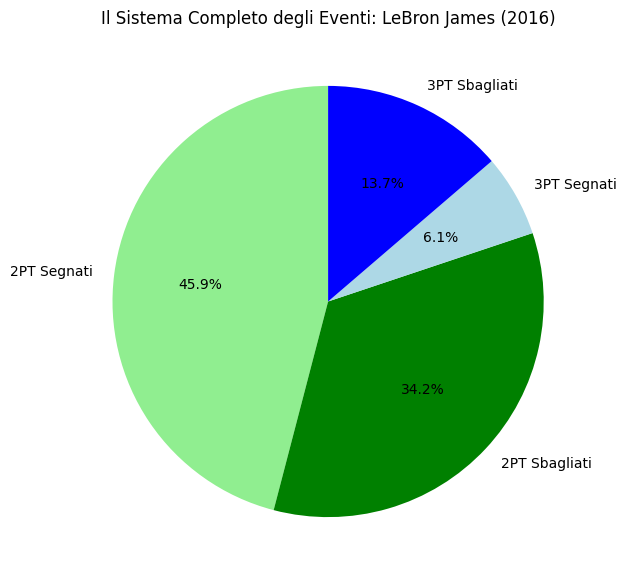

In [10]:


# --- 1. DEFINIZIONE DELL'UNIVERSO E DEGLI EVENTI ---
# L'Esperimento: "Stephen Curry effettua un tiro"
# L'Universo (Omega): L'insieme di tutti i tiri effettuati nella stagione
universo = shotsfiltered
cardinalita_universo = len(universo)

print(f"--- TEORIA DELLA PROBABILITÀ APPLICATA ---")
print(f"1. UNIVERSO (Omega): Tutti i tiri tentati.")
print(f"   Cardinalità dell'Universo: {cardinalita_universo}")

# --- 2. EVENTI E PROBABILITÀ ---
# Evento A: "Il tiro è da 3 punti"
evento_3pt = universo[universo['SHOT_TYPE'] == '3PT Field Goal']
cardinalita_A = len(evento_3pt)

# Probabilità P(A) = Casi Favorevoli / Casi Possibili
prob_A = cardinalita_A / cardinalita_universo

print(f"\n2. EVENTO A ('Tiro da 3 Punti')")
print(f"   Cardinalità Evento A: {cardinalita_A}")
print(f"   Probabilità P(A): {prob_A:.2%} (Frequenza relativa)")

# --- 3. EVENTI CERTI E IMPOSSIBILI ---
# Evento Certo: Il tiro è segnato O sbagliato (deve succedere per forza)
evento_certo = len(universo[(universo['SHOT_MADE'] == True) | (universo['SHOT_MADE'] == False)])
prob_certa = evento_certo / cardinalita_universo

# Evento Impossibile: Il tiro vale 100 punti (non esiste nel basket)
# (Simuliamo un evento impossibile filtrando una condizione assurda)
evento_impossibile = len(universo[universo['SHOT_DISTANCE'] < -5]) # Distanza negativa impossibile
prob_impossibile = evento_impossibile / cardinalita_universo

print(f"\n3. TIPI DI EVENTI")
print(f"   Probabilità Evento Certo (Segnato o Sbagliato): {prob_certa:.0f} (cioè 100%)")
print(f"   Probabilità Evento Impossibile (Distanza < 0):  {prob_impossibile:.0f} (cioè 0%)")

# --- 4. OPERAZIONI SUGLI EVENTI ---

# A. EVENTI COMPLEMENTARI (Segnato vs Sbagliato)
# Se uniti formano l'universo. Se intersecati sono vuoti.
event_made = universo[universo['SHOT_MADE'] == True]
event_missed = universo[universo['SHOT_MADE'] == False]

print(f"\n4. EVENTI COMPLEMENTARI (Made vs Missed)")
print(f"   P(Segnato) + P(Sbagliato) = {len(event_made)/cardinalita_universo:.2f} + {len(event_missed)/cardinalita_universo:.2f} = 1.0")

# B. EVENTI INCOMPATIBILI (Mutuamente Esclusivi)
# Non possono accadere insieme: Un tiro non può essere sia da 2 punti CHE da 3 punti contemporaneamente.
event_2pt = universo[universo['SHOT_TYPE'] == '2PT Field Goal']
# Intersezione (AND)
intersezione = len(universo[(universo['SHOT_TYPE'] == '2PT Field Goal') & (universo['SHOT_TYPE'] == '3PT Field Goal')])

print(f"\n5. EVENTI INCOMPATIBILI (2PT vs 3PT)")
print(f"   Elementi nell'intersezione (2PT AND 3PT): {intersezione}")
print(f"   Interpretazione: È impossibile che un tiro sia contemporaneamente da 2 e da 3.")

# --- 5. SISTEMA COMPLETO DI EVENTI (Partizione) ---
# Dividiamo l'universo in 4 pezzi che non si sovrappongono ma coprono tutto:
# 1. 2PT Segnati, 2. 2PT Sbagliati, 3. 3PT Segnati, 4. 3PT Sbagliati

case_1 = len(universo[(universo['SHOT_TYPE'] == '2PT Field Goal') & (universo['SHOT_MADE'] == True)])
case_2 = len(universo[(universo['SHOT_TYPE'] == '2PT Field Goal') & (universo['SHOT_MADE'] == False)])
case_3 = len(universo[(universo['SHOT_TYPE'] == '3PT Field Goal') & (universo['SHOT_MADE'] == True)])
case_4 = len(universo[(universo['SHOT_TYPE'] == '3PT Field Goal') & (universo['SHOT_MADE'] == False)])

# Verifica Somma
somma_parti = case_1 + case_2 + case_3 + case_4
check_sistema = (somma_parti == cardinalita_universo)

print(f"\n6. SISTEMA COMPLETO (Partizione)")
print(f"   Somma delle 4 parti: {somma_parti}")
print(f"   Uguale all'Universo? {'SÌ' if check_sistema else 'NO'}")

# --- VISUALIZZAZIONE DEL SISTEMA COMPLETO ---
labels = ['2PT Segnati', '2PT Sbagliati', '3PT Segnati', '3PT Sbagliati']
sizes = [case_1, case_2, case_3, case_4]
colors = ['lightgreen', 'green', 'lightblue', 'blue']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title(f"Il Sistema Completo degli Eventi: {player} ({season})")
plt.show()

--- TEOREMA DI BAYES: INFERENZA SUL TIRO ---
IPOTESI (H): Il tiro è da 3 punti
EVIDENZA (E): Il tiro è entrato (Canestro)
----------------------------------------
1. A PRIORI - P(H):             19.86% (Frequenza tentativi da 3)
2. VEROSIMIGLIANZA - P(E|H):    30.96% (Precisione da 3 punti)
3. EVIDENZA TOTALE - P(E):      52.08% (Precisione totale dal campo)
----------------------------------------
RISULTATO BAYESIANO - P(H|E):   11.80%
(Dato che ha segnato, c'è il 11.8% di probabilità che sia una tripla)
----------------------------------------
VERIFICA SUI DATI REALI:        11.80%
>> IL TEOREMA FUNZIONA! I calcoli coincidono.


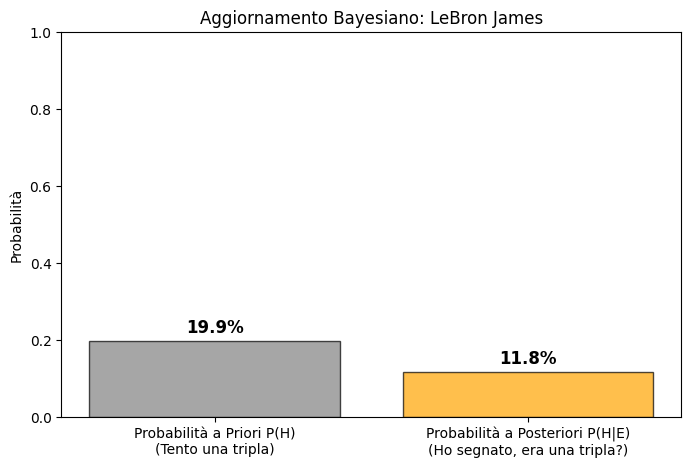

In [11]:
# --- TEOREMA DI BAYES ---
# Domanda: "Dato che il tiro è entrato (E), qual è la probabilità che sia una tripla (H)?"
# H (Hypothesis) = Il tiro è da 3 punti
# E (Evidence)   = Il tiro è segnato (Shot Made)
# Formula: P(H|E) = [P(E|H) * P(H)] / P(E)

# 1. CALCOLO DELLE PROBABILITÀ DI BASE (PRIORS & LIKELIHOOD)

# P(H): Probabilità a Priori che tiri da 3
# (Quante triple tenta rispetto al totale dei tiri?)
num_tiri_totali = len(shotsfiltered)
num_tiri_3pt = len(shotsfiltered[shotsfiltered['SHOT_TYPE'] == '3PT Field Goal'])
p_H = num_tiri_3pt / num_tiri_totali

# P(E|H): Verosimiglianza (Likelihood)
# (Dato che tira da 3, qual è la probabilità che segni? È la sua % da tre)
tiri_3pt_made = len(shotsfiltered[(shotsfiltered['SHOT_TYPE'] == '3PT Field Goal') & (shotsfiltered['SHOT_MADE'] == True)])
p_E_given_H = tiri_3pt_made / num_tiri_3pt

# P(E): Probabilità Marginale (Evidence)
# (Qual è la probabilità totale che segni un tiro qualsiasi?)
num_total_made = len(shotsfiltered[shotsfiltered['SHOT_MADE'] == True])
p_E = num_total_made / num_tiri_totali

# 2. APPLICAZIONE DEL TEOREMA DI BAYES
# Calcoliamo la P(H|E) usando la formula
p_H_given_E_bayes = (p_E_given_H * p_H) / p_E

# 3. VERIFICA EMPIRICA (La controprova)
# Calcoliamo la stessa cosa filtrando direttamente i dati:
# (Numero di triple segnate / Numero totale di canestri segnati)
p_H_given_E_real = tiri_3pt_made / num_total_made

print(f"--- TEOREMA DI BAYES: INFERENZA SUL TIRO ---")
print(f"IPOTESI (H): Il tiro è da 3 punti")
print(f"EVIDENZA (E): Il tiro è entrato (Canestro)")
print("-" * 40)
print(f"1. A PRIORI - P(H):             {p_H:.2%} (Frequenza tentativi da 3)")
print(f"2. VEROSIMIGLIANZA - P(E|H):    {p_E_given_H:.2%} (Precisione da 3 punti)")
print(f"3. EVIDENZA TOTALE - P(E):      {p_E:.2%} (Precisione totale dal campo)")
print("-" * 40)
print(f"RISULTATO BAYESIANO - P(H|E):   {p_H_given_E_bayes:.2%}")
print(f"(Dato che ha segnato, c'è il {p_H_given_E_bayes:.1%} di probabilità che sia una tripla)")
print("-" * 40)
print(f"VERIFICA SUI DATI REALI:        {p_H_given_E_real:.2%}")

# Check correttezza
if abs(p_H_given_E_bayes - p_H_given_E_real) < 0.0001:
    print(">> IL TEOREMA FUNZIONA! I calcoli coincidono.")
else:
    print(">> C'è un errore di arrotondamento.")

# --- VISUALIZZAZIONE ---
labels = ['Probabilità a Priori P(H)\n(Tento una tripla)', 'Probabilità a Posteriori P(H|E)\n(Ho segnato, era una tripla?)']
values = [p_H, p_H_given_E_bayes]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['gray', 'orange'], edgecolor='black', alpha=0.7)
plt.title(f"Aggiornamento Bayesiano: {player}")
plt.ylabel('Probabilità')
plt.ylim(0, 1.0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.1%}', ha='center', fontsize=12, fontweight='bold')

plt.show()

--- TEOREMA DELLA PROBABILITÀ TOTALE & BAYES ---
Analisi sui 5 movimenti più frequenti di LeBron James:
['Jump Shot', 'Driving Layup Shot', 'Layup Shot', 'Running Layup Shot', 'Turnaround Fadeaway shot']

TIPO DI TIRO (A)          | PRIOR P(A)   | LIKELIHOOD P(B|A)  | POSTERIOR P(A|B)  
-------------------------------------------------------------------------------------
Jump Shot                 | 32.44%      | 29.63%           | 18.45%
Driving Layup Shot        | 13.99%      | 66.16%           | 17.77%
Layup Shot                | 10.32%      | 52.05%           | 10.31%
Running Layup Shot        | 3.82%      | 79.63%           | 5.83%
Turnaround Fadeaway shot  | 3.25%      | 41.30%           | 2.58%
-------------------------------------------------------------------------------------
NOTA: La somma delle P(A|B) deve fare 100% (o quasi, escludendo i tiri rari 'Altro').


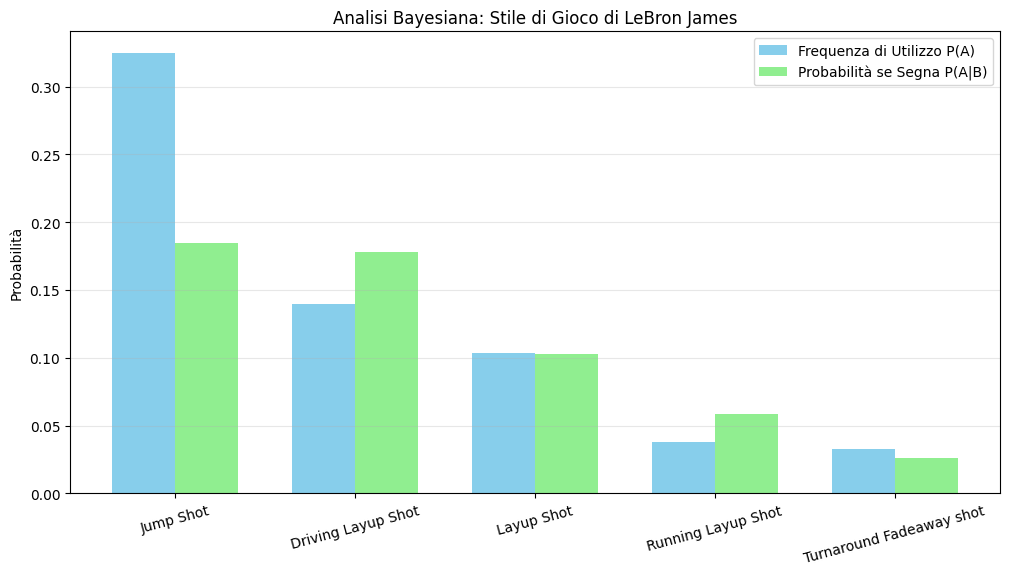

In [12]:

# 1. PREPARAZIONE DEI DATI
# La colonna ACTION_TYPE ha troppi nomi diversi (es. "Running Jump Shot", "Turnaround Jump Shot").
# Prendiamo solo i 5 tipi di tiro più frequenti per non incasinare il grafico.
top_actions = shotsfiltered['ACTION_TYPE'].value_counts().nlargest(5).index.tolist()

# Creiamo un nuovo dataframe solo con questi 5 tipi
df_top = shotsfiltered[shotsfiltered['ACTION_TYPE'].isin(top_actions)].copy()

# Calcoliamo la probabilità totale di segnare (P(B)) su tutto il dataset originale
p_made_total = shotsfiltered['SHOT_MADE'].mean()

print(f"--- TEOREMA DELLA PROBABILITÀ TOTALE & BAYES ---")
print(f"Analisi sui 5 movimenti più frequenti di {player}:")
print(f"{top_actions}\n")

print(f"{'TIPO DI TIRO (A)':<25} | {'PRIOR P(A)':<12} | {'LIKELIHOOD P(B|A)':<18} | {'POSTERIOR P(A|B)':<18}")
print("-" * 85)

results = []

# 2. CICLO DI CALCOLO PER OGNI TIPO DI TIRO
for action in top_actions:
    # Filtriamo i dati per questo specifico movimento
    subset = shotsfiltered[shotsfiltered['ACTION_TYPE'] == action]
    
    # A. PROBABILITÀ A PRIORI - P(A)
    # "Quanto spesso sceglie di fare questo tiro?"
    p_A = len(subset) / len(shotsfiltered)
    
    # B. VEROSIMIGLIANZA - P(B|A)
    # "Dato che ha scelto questo tiro, con che probabilità segna?" (La sua precisione)
    p_B_given_A = subset['SHOT_MADE'].mean()
    
    # C. PROBABILITÀ A POSTERIORI (BAYES) - P(A|B)
    # "Dato che ha segnato (B), qual è la probabilità che fosse questo tiro?"
    # Formula: P(A|B) = (P(B|A) * P(A)) / P(B_totale)
    p_A_given_B = (p_B_given_A * p_A) / p_made_total
    
    # Salviamo i dati per il grafico
    results.append({
        'Action': action,
        'Prior': p_A,
        'Likelihood': p_B_given_A,
        'Posterior': p_A_given_B
    })
    
    print(f"{action:<25} | {p_A:.2%}      | {p_B_given_A:.2%}           | {p_A_given_B:.2%}")

print("-" * 85)
print(f"NOTA: La somma delle P(A|B) deve fare 100% (o quasi, escludendo i tiri rari 'Altro').")

# 3. GRAFICO: CONFRONTO A PRIORI vs A POSTERIORI
df_res = pd.DataFrame(results).set_index('Action')

fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(df_res))
width = 0.35

# Barre: Quanto lo usa (Blu) vs Quanto contribuisce ai canestri (Verde)
ax.bar([i - width/2 for i in x], df_res['Prior'], width, label='Frequenza di Utilizzo P(A)', color='skyblue')
ax.bar([i + width/2 for i in x], df_res['Posterior'], width, label='Probabilità se Segna P(A|B)', color='lightgreen')

ax.set_ylabel('Probabilità')
ax.set_title(f'Analisi Bayesiana: Stile di Gioco di {player}')
ax.set_xticks(x)
ax.set_xticklabels(df_res.index, rotation=15)
ax.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

--- TEST D'IPOTESI AVANZATI (MATPLOTLIB VERSION) ---

1. RISULTATI T-TEST (Confronto Medie Distanze)
   Media Segnati:   6.49 ft
   Media Sbagliati: 13.03 ft
   P-Value: 0.00000

2. RISULTATI CHI-QUADRO (Dipendenza dal Quarto)
   P-Value: 0.49705


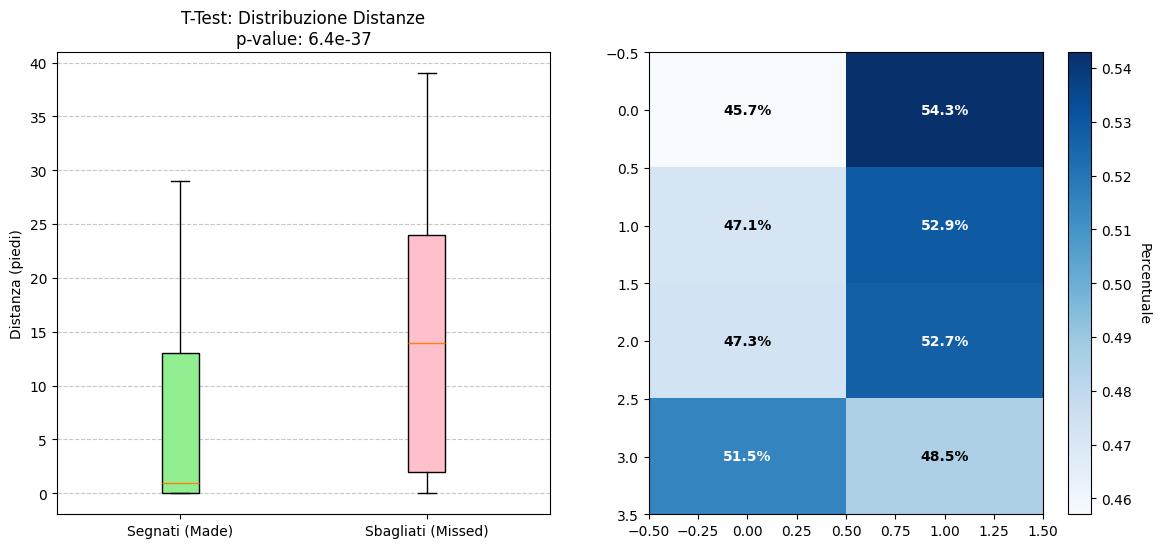

In [13]:
print("--- TEST D'IPOTESI AVANZATI (MATPLOTLIB VERSION) ---\n")

# ==============================================================================
# 1. PREPARAZIONE DATI PER T-TEST
# ==============================================================================
dist_segnati = shotsfiltered[shotsfiltered['SHOT_MADE'] == True]['SHOT_DISTANCE']
dist_sbagliati = shotsfiltered[shotsfiltered['SHOT_MADE'] == False]['SHOT_DISTANCE']

# Eseguiamo il T-Test
t_stat, p_value_t = stats.ttest_ind(dist_segnati, dist_sbagliati, equal_var=False)

print(f"1. RISULTATI T-TEST (Confronto Medie Distanze)")
print(f"   Media Segnati:   {dist_segnati.mean():.2f} ft")
print(f"   Media Sbagliati: {dist_sbagliati.mean():.2f} ft")
print(f"   P-Value: {p_value_t:.5f}")

# ==============================================================================
# 2. PREPARAZIONE DATI PER CHI-QUADRO
# ==============================================================================
contingency_table = pd.crosstab(shotsfiltered['QUARTER'], shotsfiltered['SHOT_MADE'])
# Teniamo solo i quarti 1, 2, 3, 4
contingency_table = contingency_table.loc[[1, 2, 3, 4]]

# Eseguiamo il Chi-Quadro
chi2, p_value_chi, dof, expected = stats.chi2_contingency(contingency_table)

# Calcoliamo le percentuali per la Heatmap (più facile da leggere dei numeri assoluti)
# Dividiamo ogni riga per il totale dei tiri di quel quarto
accuracy_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

print(f"\n2. RISULTATI CHI-QUADRO (Dipendenza dal Quarto)")
print(f"   P-Value: {p_value_chi:.5f}")


# ==============================================================================
# 3. VISUALIZZAZIONE CON MATPLOTLIB PURO
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- GRAFICO A: BOXPLOT (T-Test) ---
# Creiamo il boxplot
bplot = ax[0].boxplot([dist_segnati, dist_sbagliati], 
                      patch_artist=True,  # Necessario per colorare dentro
                      tick_labels=['Segnati (Made)', 'Sbagliati (Missed)'])

# Coloriamo i box manualmente (Senza Seaborn bisogna fare così)
colors = ['lightgreen', 'pink']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax[0].set_title(f'T-Test: Distribuzione Distanze\np-value: {p_value_t:.1e}')
ax[0].set_ylabel('Distanza (piedi)')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- GRAFICO B: HEATMAP (Chi-Quadro) ---
# Matplotlib usa 'imshow' per le heatmap
# Usiamo la tabella delle percentuali
im = ax[1].imshow(accuracy_table, cmap='Blues', aspect='auto')

# Aggiungiamo la barra laterale dei colori
cbar = ax[1].figure.colorbar(im, ax=ax[1])
cbar.ax.set_ylabel('Percentuale', rotation=-90, va="bottom")

# Aggiungiamo i numeri dentro i quadrati (Annotazioni manuali)
# Dobbiamo ciclare su righe (i) e colonne (j)
for i in range(len(accuracy_table)):
    for j in range(len(accuracy_table.columns)):
        valore = accuracy_table.iloc[i, j]
        text_color = "white" if valore > 0.5 else "black" # Contrasto testo
        text = ax[1].text(j, i, f"{valore:.1%}",
                       ha="center", va="center", color=text_color, fontweight='bold')

# Impostiamo le etichette degli

2016
--- CONFRONTO DIRETTO: Stephen Curry vs LeBron James (2016) ---

Stephen Curry: 0 tiri, Media Distanza: nan ft
LeBron James: 0 tiri, Media Distanza: nan ft

RISULTATO T-TEST:
T-Statistic: nan
P-Value: nan
>> CONCLUSIONE: Non c'è differenza significativa nelle distanze medie.


C:\Users\AlessandroMacchi\AppData\Local\Temp\ipykernel_25740\2803501844.py:30: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = stats.ttest_ind(dist_A, dist_B, equal_var=False)
c:\Users\AlessandroMacchi\Downloads\Progetti\nbastatsviewer\.venv\Lib\site-packages\numpy\lib\_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges
C:\Users\AlessandroMacchi\AppData\Local\Temp\ipykernel_25740\2803501844.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax[1].boxplot([dist_A, dist_B],


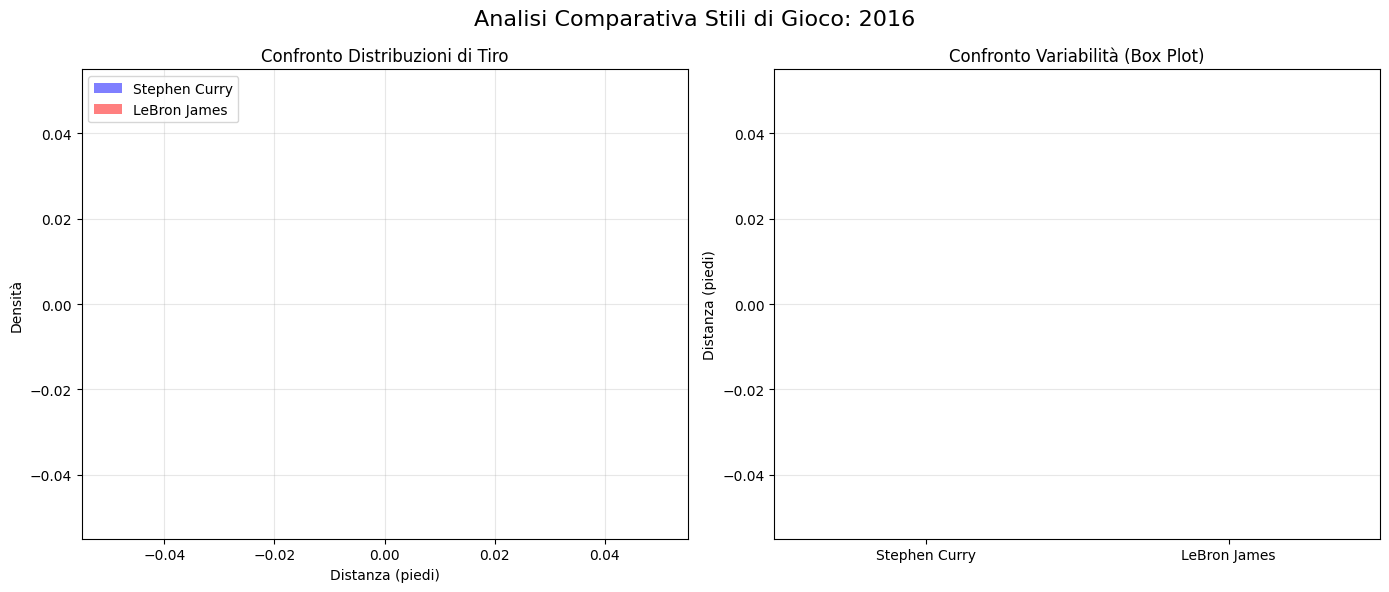

In [14]:
# 1. SELEZIONE DEI DUE GIOCATORI
player_A = 'Stephen Curry'
player_B = 'LeBron James' # O prova 'DeAndre Jordan' per un contrasto estremo
print (season)
print(f"--- CONFRONTO DIRETTO: {player_A} vs {player_B} ({season}) ---\n")

# 2. ESTRAZIONE DATI
# Filtriamo i dati per i due giocatori
data_A = shots[
    (shots['SEASON_2'] == season) & 
    (shots['PLAYER_NAME'] == player_A)
].copy()

data_B = shots[
    (shots['SEASON_2'] == season) & 
    (shots['PLAYER_NAME'] == player_B)
].copy()

# Calcolo distanze
dist_A = np.sqrt(data_A['LOC_X']**2 + data_A['LOC_Y']**2) / 10
dist_B = np.sqrt(data_B['LOC_X']**2 + data_B['LOC_Y']**2) / 10

# 3. STATISTICHE DESCRITTIVE
print(f"{player_A}: {len(dist_A)} tiri, Media Distanza: {dist_A.mean():.2f} ft")
print(f"{player_B}: {len(dist_B)} tiri, Media Distanza: {dist_B.mean():.2f} ft")

# 4. T-TEST PER CAMPIONI INDIPENDENTI
# H0: Le distanze medie di tiro sono UGUALI
# H1: Le distanze medie sono DIVERSE
t_stat, p_val = stats.ttest_ind(dist_A, dist_B, equal_var=False)

print(f"\nRISULTATO T-TEST:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_val:.5e}")

if p_val < 0.05:
    print(">> CONCLUSIONE: La differenza di stile è statisticamente SIGNIFICATIVA.")
else:
    print(">> CONCLUSIONE: Non c'è differenza significativa nelle distanze medie.")

# 5. VISUALIZZAZIONE (MATPLOTLIB PURO)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- GRAFICO 1: ISTOGRAMMI SOVRAPPOSTI ---
# alpha=0.5 serve a renderli trasparenti per vedere dove si sovrappongono
ax[0].hist(dist_A, bins=30, alpha=0.5, color='blue', label=player_A, density=True)
ax[0].hist(dist_B, bins=30, alpha=0.5, color='red', label=player_B, density=True)

ax[0].set_title('Confronto Distribuzioni di Tiro')
ax[0].set_xlabel('Distanza (piedi)')
ax[0].set_ylabel('Densità')
ax[0].legend()
ax[0].grid(alpha=0.3)

# --- GRAFICO 2: BOX PLOT AFFIANCATI ---
bplot = ax[1].boxplot([dist_A, dist_B], 
                      patch_artist=True,
                      labels=[player_A, player_B])

# Coloriamo i box per distinguerli
colors = ['lightblue', 'pink']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax[1].set_title('Confronto Variabilità (Box Plot)')
ax[1].set_ylabel('Distanza (piedi)')
ax[1].grid(axis='y', alpha=0.3)

plt.suptitle(f"Analisi Comparativa Stili di Gioco: {season}", fontsize=16)
plt.tight_layout()
plt.show()